In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from segmentation_eva import *
from plot_eva import *
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
filename = "ctrl_450Pa_2-1.tif"

In [5]:
img = loading(filename)

In [6]:
print("shape: {}".format(img.shape))
print("dtype: {}".format(img.dtype))
print("range: ({}, {})".format(img.min(), img.max()))

shape: (21, 964, 964, 4)
dtype: uint16
range: (0, 65535)


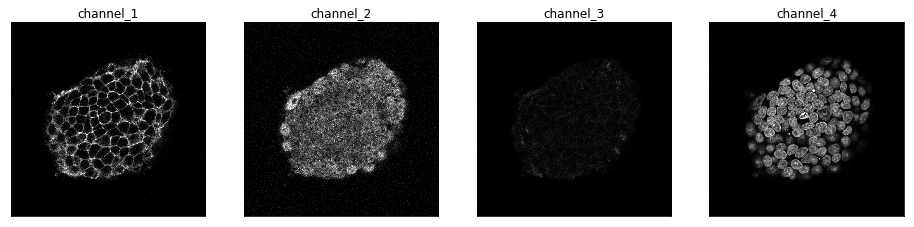

In [7]:
display_channels(img)

In [8]:
actin, yap, prot, dapi = img.transpose(3,0,1,2)

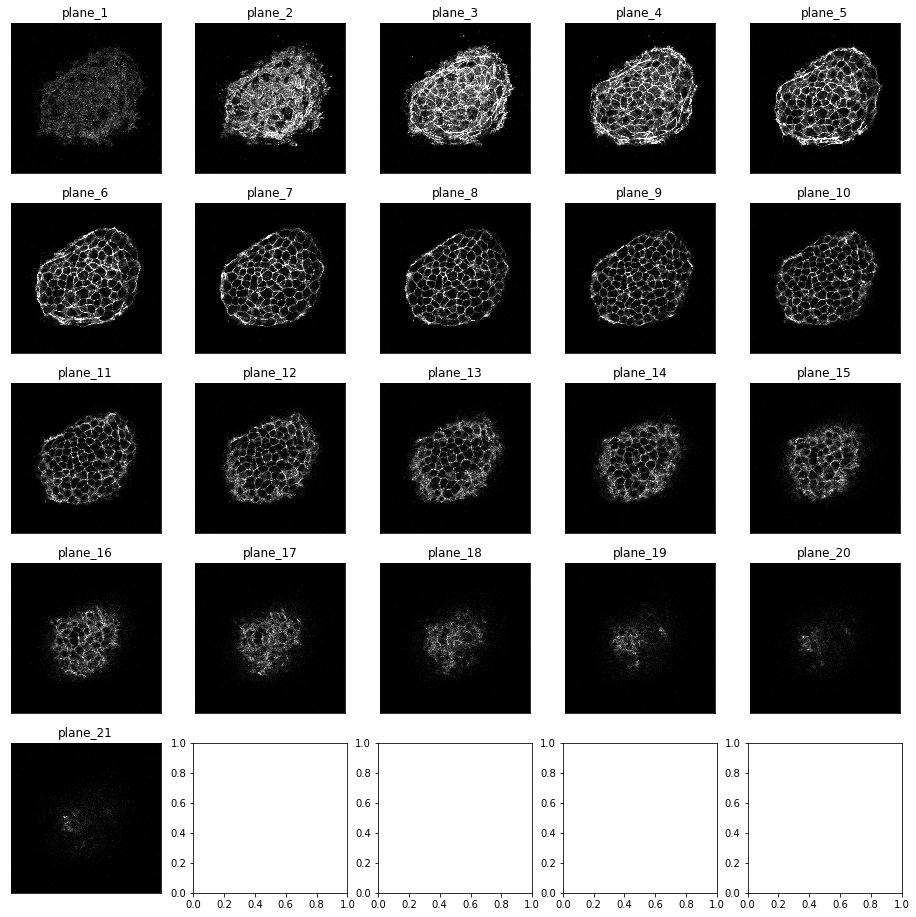

In [9]:
display_all_zsteps(actin)

In [10]:
bbox = roi(dapi)

In [11]:
dapi_roi = dapi[bbox[0]]
yap_roi = yap[bbox[0]]
actin_roi = actin[bbox[0]]

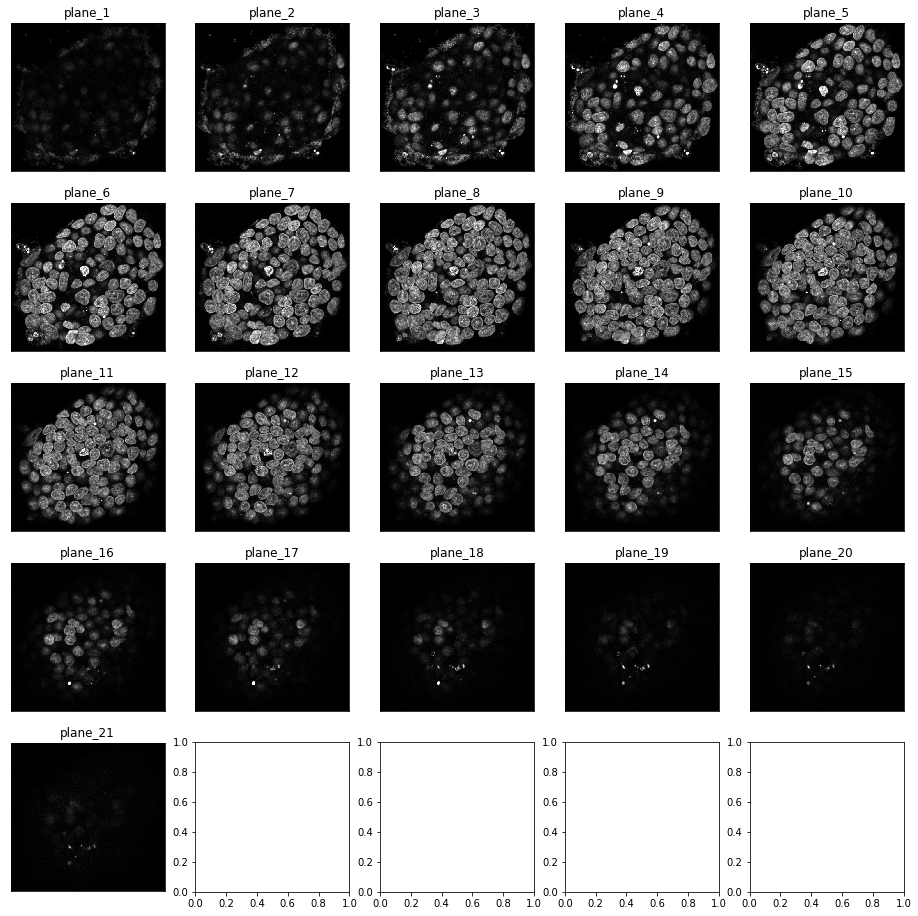

In [12]:
display_all_zsteps(dapi_roi)

In [13]:
dapi_float = img_as_float(dapi_roi)
yap_float = img_as_float(yap_roi)
actin_float = img_as_float(actin_roi)

In [14]:
dapi_float_tvc = restoration.denoise_tv_chambolle(dapi_float, weight = 0.1)
yap_float_tvc = restoration.denoise_tv_chambolle(yap_float, weight = 0.1)
actin_float_tvc = restoration.denoise_tv_chambolle(actin_float, weight = 0.1)

In [15]:
seg_nucleus, nucleus_mask, background = segment_nucleus(dapi_float_tvc)

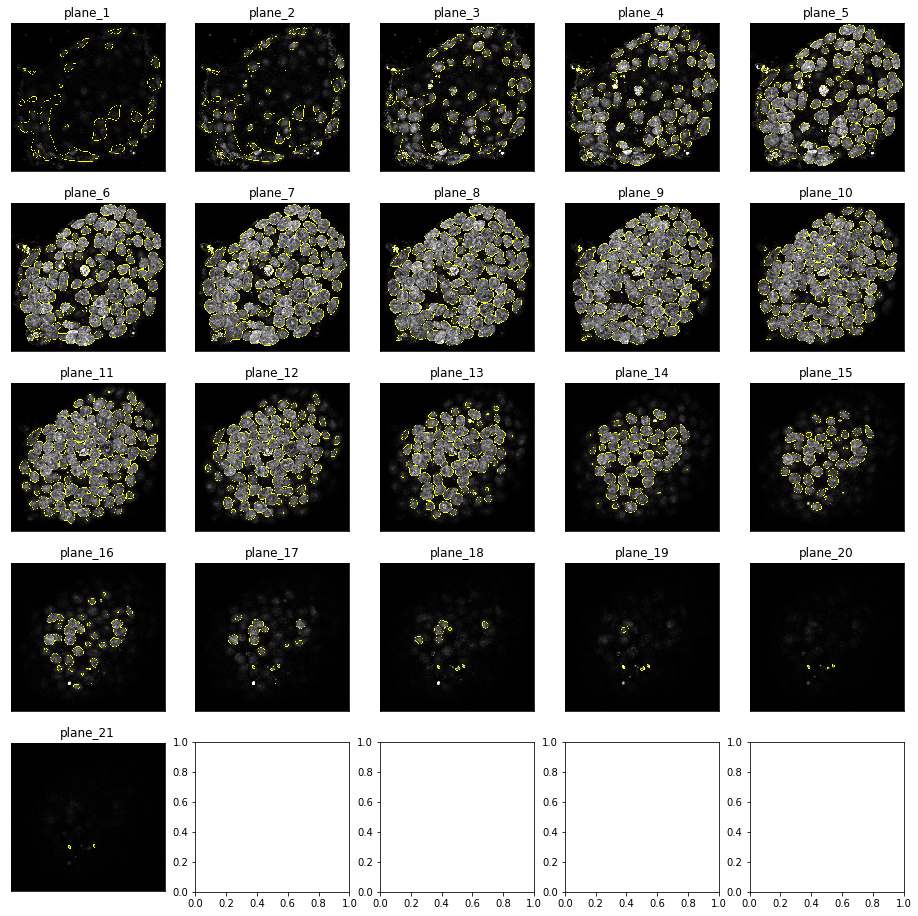

In [16]:
display_seg(dapi_roi, seg_nucleus)

In [17]:
markers_3D, idx = marker_ind_cells(actin_float_tvc, background)

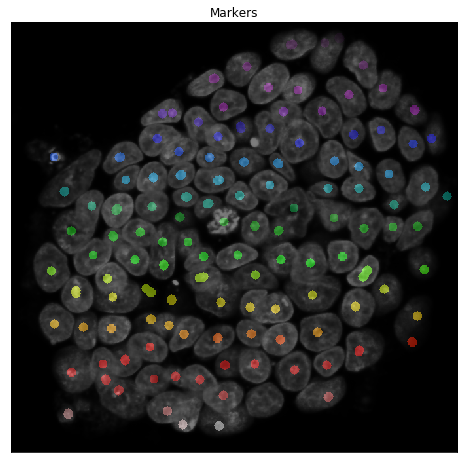

In [18]:
fig, ax = plt.subplots()
ax.imshow(dapi_float_tvc[idx])
ax.imshow(markers_3D[idx], cmap = "nipy_spectral", alpha = 0.5)
ax.set_title('Markers')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [19]:
mask_yap = background_yap(yap_float_tvc)

In [20]:
seg_actin = segment_actin(actin_float_tvc, mask_yap, markers_3D)

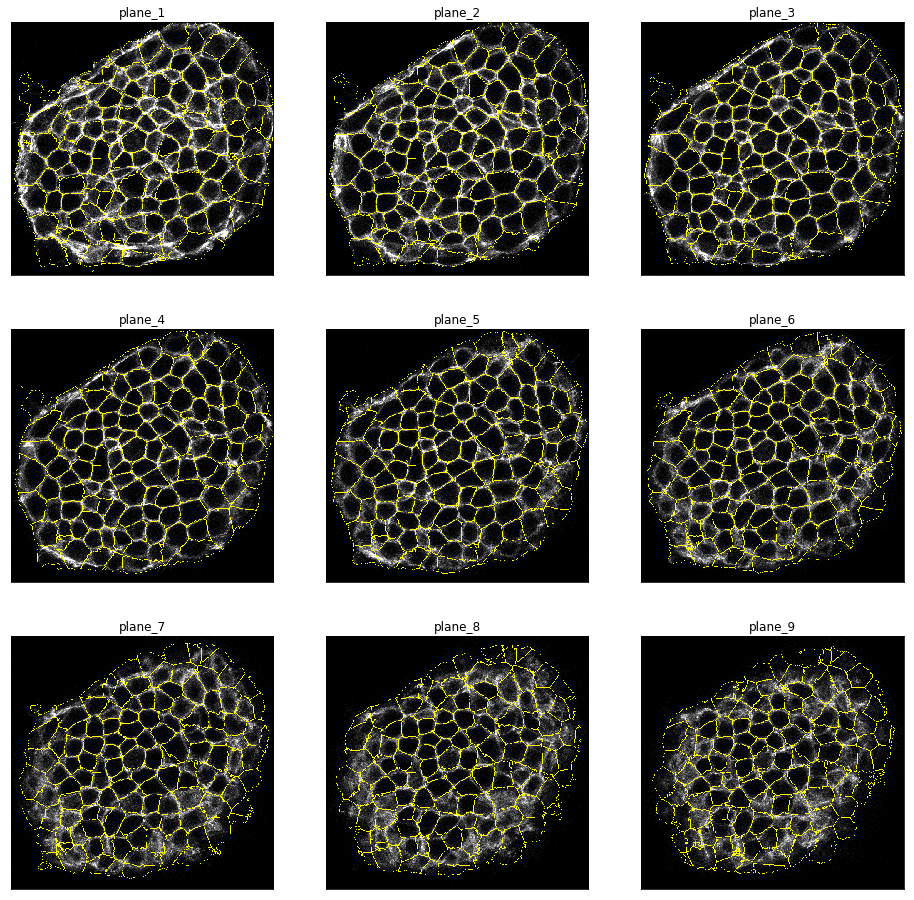

In [21]:
display_seg(actin_roi[5:14], seg_actin[5:14])

In [22]:
regprops_yap_nucleus = regionprop_protein_in_mask(yap_roi, nucleus_mask, seg_actin)

In [23]:
regprops_yap_cyto = regionprop_protein_in_mask(yap_roi, nucleus_mask, seg_actin, inside = False)

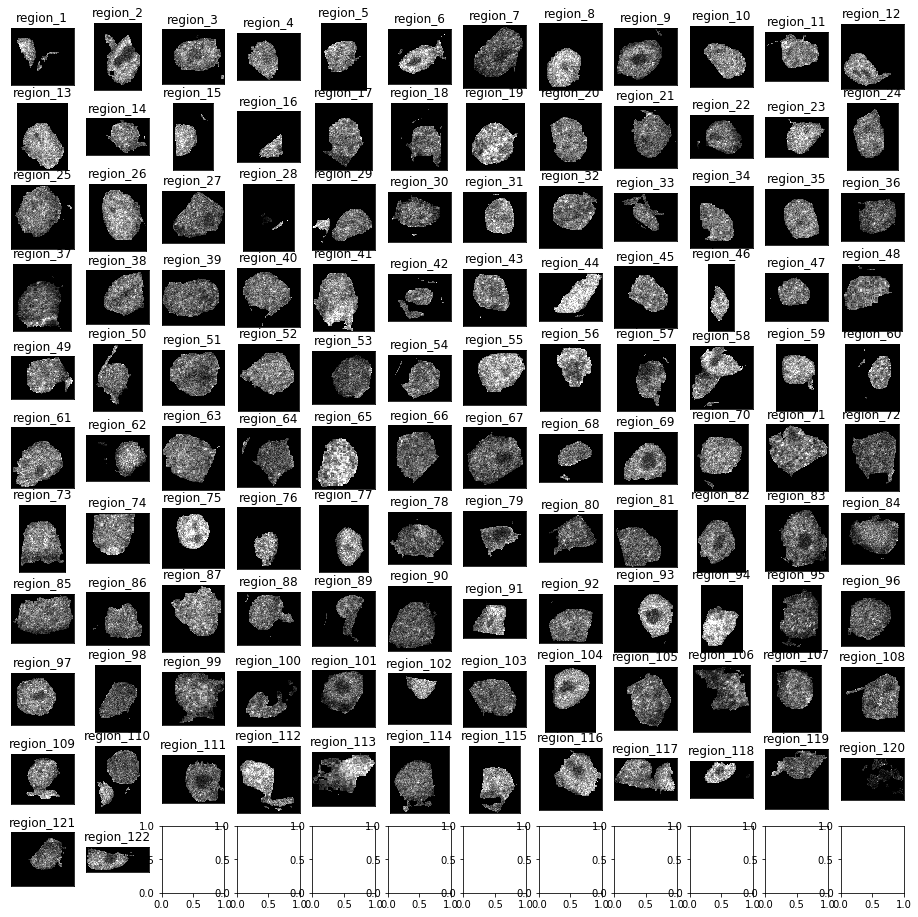

In [24]:
plot_list_int(regprops_yap_nucleus)

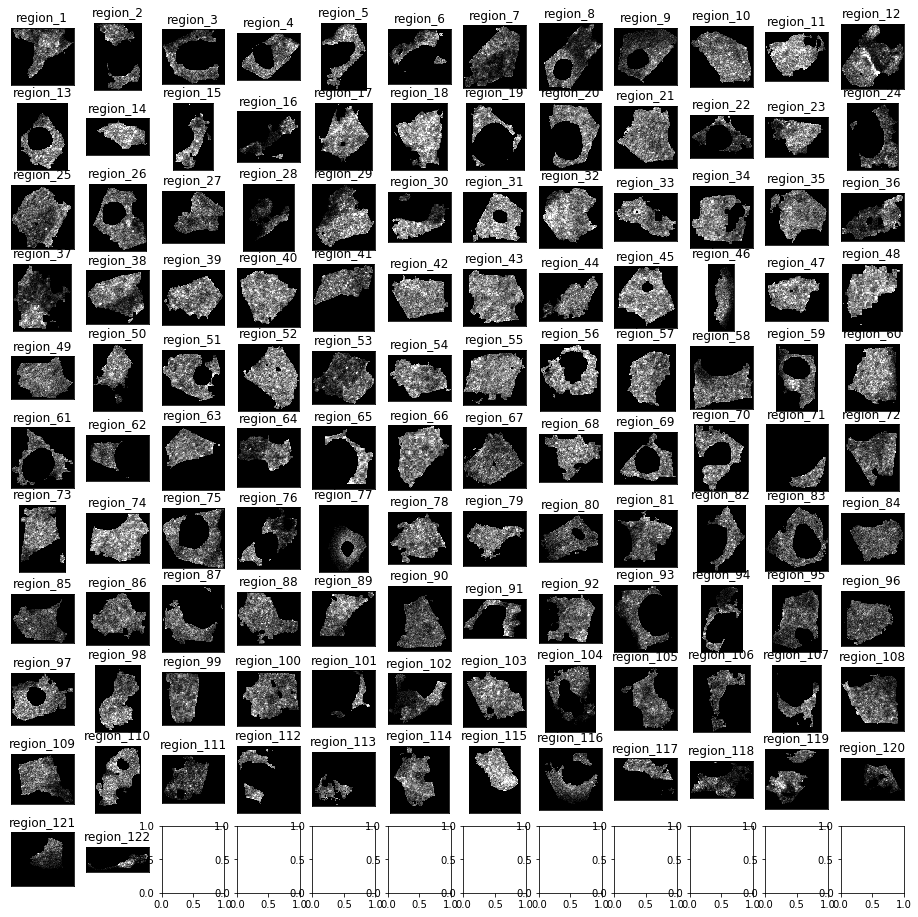

In [25]:
plot_list_int(regprops_yap_cyto)

In [26]:
label_outside_list = outer_layer(mask_yap, seg_actin, idx)

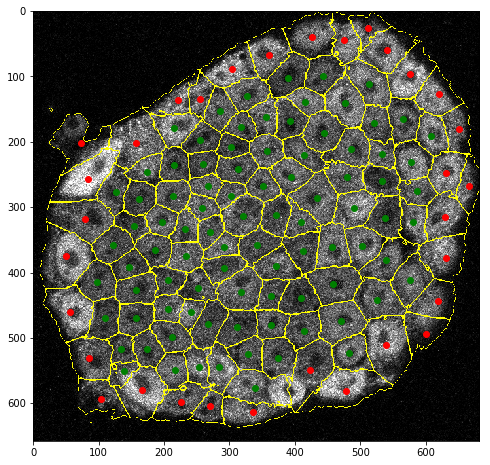

In [27]:
plot_outer_cells(yap_roi, seg_actin, idx, regprops_yap_cyto, label_outside_list)

In [28]:
mean_int_cyto_inside, mean_int_cyto_outside = list_mean_int_in_out(regprops_yap_cyto, label_outside_list)

In [29]:
mean_int_nucleus_inside, mean_int_nucleus_outside = list_mean_int_in_out(regprops_yap_nucleus, label_outside_list)

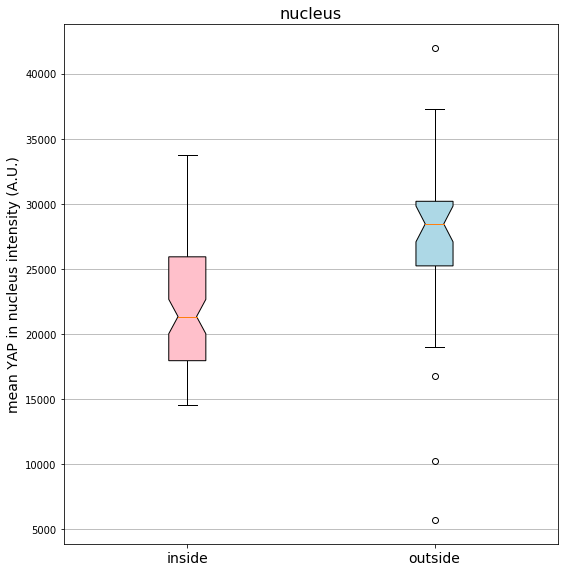

In [36]:
box_plot_mean(mean_int_nucleus_inside, mean_int_nucleus_outside, title = "nucleus")

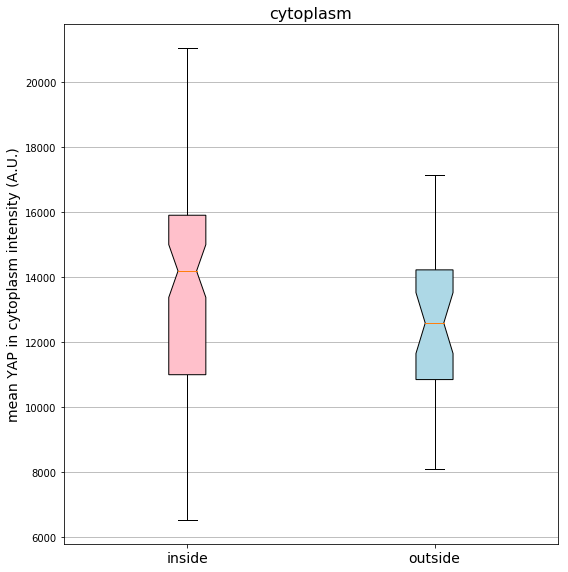

In [37]:
box_plot_mean(mean_int_cyto_inside, mean_int_cyto_outside, title = "cytoplasm")